In [284]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math as math
import warnings; warnings.simplefilter('ignore')
with open("nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [285]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [286]:
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [287]:
# player - name of the player
# pos - the position of the player
# g - number of games the player was in
# gs - number of games the player started
# pts - total points the player scored

In [288]:
# Dropping the object data columns
nba.drop(nba.select_dtypes(['object']),inplace=True, axis=1)
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0.520,0,0,NaN,...,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013


In [289]:
#Normalizing columns
nba_new = nba.groupby(nba.columns, axis = 1).transform(lambda x: x.fillna(0))
print(nba_new.isnull().values.any())
print(nba_new.head())

False
   age   g  gs    mp   fg   fga    fg.  x3p  x3pa      x3p.     ...      orb  \
0   23  63   0   847   66   141  0.468    4    15  0.266667     ...       72   
1   20  81  20  1197   93   185  0.503    0     0  0.000000     ...      142   
2   27  53  12   961  143   275  0.520    0     0  0.000000     ...      102   
3   28  73  73  2552  464  1011  0.459  128   300  0.426667     ...       32   
4   25  56  30   951  136   249  0.546    0     1  0.000000     ...       94   

   drb  trb  ast  stl  blk  tov   pf   pts  season_end  
0  144  216   28   23   26   30  122   171        2013  
1  190  332   43   40   57   71  203   265        2013  
2  204  306   38   24   36   39  108   362        2013  
3  230  262  248   35    3  146  136  1330        2013  
4  183  277   40   23   46   63  187   328        2013  

[5 rows x 27 columns]


In [290]:
# Determine the correlation of data 
corr_val= nba_new.corr()
print(corr_val['pts'])

age          -0.011910
g             0.728462
gs            0.810294
mp            0.927464
fg            0.992041
fga           0.989211
fg.           0.257634
x3p           0.655342
x3pa          0.672076
x3p.          0.272773
x2p           0.931493
x2pa          0.937036
x2p.          0.234833
efg.          0.277257
ft            0.927618
fta           0.918979
ft.           0.370515
orb           0.505524
drb           0.784675
trb           0.725930
ast           0.738295
stl           0.797449
blk           0.433549
tov           0.912724
pf            0.778060
pts           1.000000
season_end         NaN
Name: pts, dtype: float64


In [291]:
Y = nba_new.pop('pts')

In [293]:
X = nba_new.copy()
X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'season_end'],
      dtype='object')

In [304]:
# Split Train and Test data

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [305]:
# Checking the optimal value of n_neighbors for the best accuracy. 

for neighbor_value in range(20): 
    neighbor_value = neighbor_value+1
    knn = KNeighborsRegressor(n_neighbors = neighbor_value, weights='distance',algorithm='auto')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    print(knn.score(X_test, y_test))

0.965210041318
0.96288591482
0.972706619424
0.97782926381
0.980290412582
0.984064804122
0.983606704844
0.984556242753
0.984466325045
0.985128503314
0.985339379868
0.984991201083
0.984644536913
0.983734263924
0.982538796981
0.982678209777
0.982445266046
0.982211450423
0.982370804132
0.982978915729


In [306]:
# Predicting the model with n_neighbours as 11 (Inferred from the previous result). 

knn = KNeighborsRegressor(n_neighbors = 11, weights='distance',algorithm='auto')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(y_pred.round(), y_test)

0.985339379868
[  581.   463.   166.   133.    26.   184.    89.    78.    10.    27.
    60.   125.    90.    18.   465.  1097.   333.   647.   479.   667.
    60.  1323.  1149.   825.     2.   535.  1064.     2.   312.   190.
   749.   333.   381.  1038.   242.   365.   773.    30.   115.   742.
   536.   192.   564.   208.    39.   438.    90.  1051.    11.   528.
  1174.  1579.  1072.   665.   748.  1604.   848.     2.   627.   872.
   653.   109.   624.  1107.   302.   966.  1039.  1011.  1113.   451.
    37.  1076.   358.    49.   177.  1240.   426.   795.     3.     4.
   268.   108.   198.    89.   764.   556.   602.   513.   241.    37.
   848.   188.  1287.   352.  1193.   325.   203.] [ 511  483  178  150   38  138   99   97    6   33   73  107   99   26  429
 1068  384  665  408  703   47 1248 1257  911    0  618 1134    0  273  273
  758  252  350 1042  274  338  715   29  115  770  499  159  495  270   27
  401   75 1095   12  579 1081 1560 1069  677  646 1583  911    0  

In [307]:
# Mean squared error (MSE)
MSE= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Mean Squared Error Value of the test : ', MSE)

Mean Squared Error Value of the test :  [ 2573.91691731]


In [314]:
act_pred_dict = {'Actual':y_test,'Predicted':y_pred}
act_pred = pd.DataFrame(act_pred_dict)

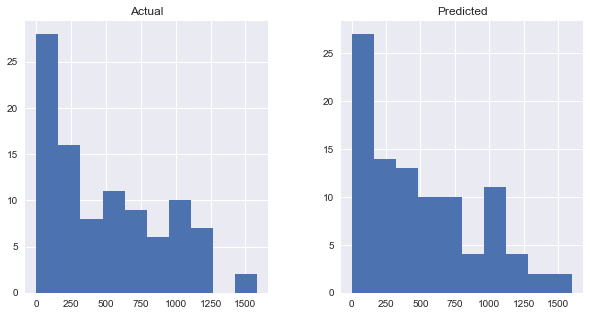

In [317]:
# Realizing the comparison using a histogram 
act_pred.hist(figsize=(10,5))
plt.show()